<a href="https://colab.research.google.com/github/orangegreen212/Review-Sentiment-Analysis-Positve-Negative-Neutral/blob/main/Review_Sentiment_Analysis_Positve_Negative_Neutral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Review Sentiment Analysis Positive/Negative**

The objective of this project is to conduct sentiment analysis on a dataset of user comments, aiming to automatically determine whether the sentiment expressed in each comment is positive or negative. The data for this analysis was obtained from a publicly available dataset on [Kaggle](https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/input).

## Uploading all necessary libraries and preparing dataset

In [ ]:
!pip install --quiet vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Data for GC/Reviews.csv')

In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


Merge 2 columns  - **Summary** and **Text** into **all_text** column

In [ ]:

df['Summary'] = df['Summary'].fillna('')
df['Text'] = df['Text'].fillna('')
df['all_text'] = df['Summary'] + ' ' + df['Text']

df['all_text'] = df['all_text'].str.strip()

df_processed = df[['Score', 'all_text']].copy() # Используем .copy() чтобы избежать SettingWithCopyWarning
df_processed


,Score,all_text
0,5,Good Quality Dog Food I have bought several of...
1,1,Not as Advertised Product arrived labeled as J...
2,4,"""Delight"" says it all This is a confection tha..."
3,2,Cough Medicine If you are looking for the secr...
4,5,Great taffy Great taffy at a great price. The...
...,...,...
568449,5,Will not do without Great for sesame chicken.....
568450,2,disappointed I'm disappointed with the flavor....
568451,5,Perfect for our maltipoo These stars are small...
568452,5,Favorite Training and reward treat These are t...


In [ ]:
df_processed = df_processed[df_processed['all_text'] != '']

df_processed = df_processed[df_processed['Score'] != 0] # Раскомментируйте, если нужно

print("Processed DataFrame:")
print(df_processed.head())
print(f"\nQuantity rows after processing {len(df_processed)}")

Processed DataFrame:
   Score                                           all_text
0      5  Good Quality Dog Food I have bought several of...
1      1  Not as Advertised Product arrived labeled as J...
2      4  "Delight" says it all This is a confection tha...
3      2  Cough Medicine If you are looking for the secr...
4      5  Great taffy Great taffy at a great price.  The...

Quantity rows after processing: 568454


In [53]:
chars_to_remove = r'["“”;\'!-]'

df_processed['all_text'] = df_processed['all_text'].str.replace(chars_to_remove, '', regex=True)


print(df_processed[['all_text', 'all_text']])

                                                 all_text  \
0       Good Quality Dog Food I have bought several of...   
1       Not as Advertised Product arrived labeled as J...   
2       Delight says it all This is a confection that ...   
3       Cough Medicine If you are looking for the secr...   
4       Great taffy Great taffy at a great price.  The...   
...                                                   ...   
568449  Will not do without Great for sesame chicken.....   
568450  disappointed Im disappointed with the flavor. ...   
568451  Perfect for our maltipoo These stars are small...   
568452  Favorite Training and reward treat These are t...   
568453  Great Honey I am very satisfied ,product is as...   

                                                 all_text  
0       Good Quality Dog Food I have bought several of...  
1       Not as Advertised Product arrived labeled as J...  
2       Delight says it all This is a confection that ...  
3       Cough Medicine If y

Mapping numerical sentiment scores to categorical labels (Negative, Neutral, Positive)

In [54]:
def score_to_sentiment(score):
    if score in [1, 2]:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    elif score in [4, 5]:
        return 'Positive'
    return None

In [55]:
df_processed['Sentiment_from_Score'] = df_processed['Score'].apply(score_to_sentiment)
df_processed

,Score,all_text,Sentiment_from_Score
0,5,Good Quality Dog Food I have bought several of...,Positive
1,1,Not as Advertised Product arrived labeled as J...,Negative
2,4,Delight says it all This is a confection that ...,Positive
3,2,Cough Medicine If you are looking for the secr...,Negative
4,5,Great taffy Great taffy at a great price. The...,Positive
...,...,...,...
568449,5,Will not do without Great for sesame chicken.....,Positive
568450,2,disappointed Im disappointed with the flavor. ...,Negative
568451,5,Perfect for our maltipoo These stars are small...,Positive
568452,5,Favorite Training and reward treat These are t...,Positive


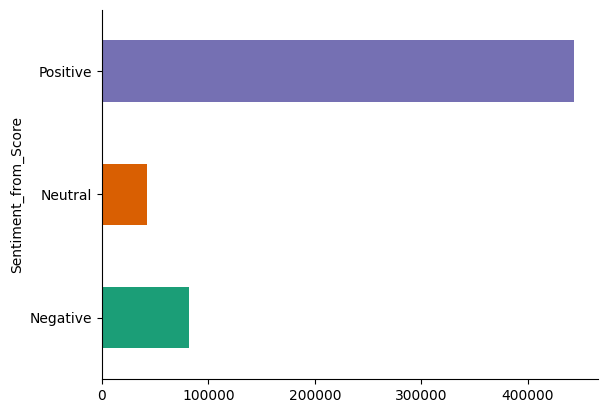

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns
df_processed.groupby('Sentiment_from_Score').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Initialize VADER Sentiment Analyzer

In [57]:

analyzer = SentimentIntensityAnalyzer()
example_text = df_processed['all_text'].iloc[0]
vs = analyzer.polarity_scores(example_text)
print(f"  VADER for text  '{example_text[:50]}...': {vs}")
print(f"  Compound score: {vs['compound']} ( > 0.05 positive, < -0.05 negative)")

  VADER for text  'Good Quality Dog Food I have bought several of the...': {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'compound': 0.9583}
  Compound score: 0.9583 ( > 0.05 positive, < -0.05 negative)


Quick Naive Bayes model

In [58]:
temp_df = df_processed.dropna(subset=['Sentiment_from_Score', 'all_text'])
temp_df = temp_df[temp_df['all_text'] != '']

if not temp_df.empty:
     X_train, X_test, y_train, y_test = train_test_split(
         temp_df['all_text'],
         temp_df['Sentiment_from_Score'],
         test_size=0.2,
         random_state=42
    )
     vectorizer = TfidfVectorizer(max_features=10000)
     X_train_tfidf = vectorizer.fit_transform(X_train)
     X_test_tfidf = vectorizer.transform(X_test)

     model = MultinomialNB()
     model.fit(X_train_tfidf, y_train)
     predictions = model.predict(X_test_tfidf)
     print("\n Classification report (Naive Bayes на TF-IDF):")
     print(classification_report(y_test, predictions))
else:
     print("  Not enough data after deleting NaN.")




 Classification report (Naive Bayes на TF-IDF):
              precision    recall  f1-score   support

    Negative       0.85      0.36      0.50     16181
     Neutral       0.55      0.01      0.02      8485
    Positive       0.83      0.99      0.90     89025

    accuracy                           0.83    113691
   macro avg       0.74      0.45      0.47    113691
weighted avg       0.81      0.83      0.78    113691



The model is heavily biased towards the dominant "Positive" class due to class imbalance. It is ineffective at recognizing "Neutral" and struggles significantly with "Negative" samples. So needed to provide resampling of dataset to train the model after



In [59]:
y_binary = df_processed['Sentiment_from_Score'].apply(
       lambda x: 'Positive_Neutral' if x in ['Positive', 'Neutral'] else 'Negative'
 )
X = df_processed['all_text']
y = df_processed['Sentiment_from_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(max_features=5000) # или ваши параметры
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Shape of X_train_tfidf before resampling: {X_train_tfidf.shape}")
print(f"Original training dataset shape: {Counter(y_train)}")

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_tfidf, y_train)

print(f"Shape of X_train_tfidf after resampling: {X_train_resampled.shape}")
print(f"Resampled training dataset shape: {Counter(y_train_resampled)}")

Shape of X_train_tfidf before resampling: (454763, 5000)
Original training dataset shape: Counter({'Positive': 355021, 'Negative': 65630, 'Neutral': 34112})
Shape of X_train_tfidf after resampling: (102336, 5000)
Resampled training dataset shape: Counter({'Negative': 34112, 'Neutral': 34112, 'Positive': 34112})


Train a Multinomial Naive Bayes model

In [ ]:
# Train the model on resampled data
model = MultinomialNB()
model.fit(X_train_resampled, y_train_resampled)

# Predict on the original (imbalanced) test set
y_pred = model.predict(X_test_tfidf)
y_pred_proba = model.predict_proba(X_test_tfidf)

# Evaluate
print("\n--- Classification Report on Test Set ---")
print(classification_report(y_test, y_pred, target_names=model.classes_)) # Use model.classes_ for target_names

print("\n--- Confusion Matrix on Test Set ---")

print(confusion_matrix(y_test, y_pred, labels=model.classes_))


--- Classification Report on Test Set ---
              precision    recall  f1-score   support

    Negative       0.61      0.71      0.65     16407
     Neutral       0.23      0.65      0.34      8528
    Positive       0.97      0.78      0.86     88756

    accuracy                           0.76    113691
   macro avg       0.60      0.71      0.62    113691
weighted avg       0.86      0.76      0.79    113691


--- Confusion Matrix on Test Set ---
[[11600  3892   915]
 [ 1871  5552  1105]
 [ 5611 14318 68827]]


In [45]:
# --- ROC AUC and PR AUC for Multi-class (One-vs-Rest) ---
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=model.classes_)
n_classes = len(model.classes_)

# ROC AUC
roc_auc_ovr = {}
for i, class_name in enumerate(model.classes_):
    roc_auc_ovr[class_name] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])
    print(f"ROC AUC Score ({class_name} vs Rest): {roc_auc_ovr[class_name]:.4f}")

# Macro-average ROC AUC
roc_auc_macro = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')
print(f"\nMacro-Averaged ROC AUC Score: {roc_auc_macro:.4f}")


# Precision-Recall AUC
pr_auc_ovr = {}
for i, class_name in enumerate(model.classes_):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    pr_auc_ovr[class_name] = auc(recall, precision)
    print(f"PR AUC Score ({class_name} vs Rest): {pr_auc_ovr[class_name]:.4f}")

ROC AUC Score (Negative vs Rest): 0.9264
ROC AUC Score (Neutral vs Rest): 0.8311
ROC AUC Score (Positive vs Rest): 0.9320

Macro-Averaged ROC AUC Score: 0.8965
PR AUC Score (Negative vs Rest): 0.7330
PR AUC Score (Neutral vs Rest): 0.3040
PR AUC Score (Positive vs Rest): 0.9788


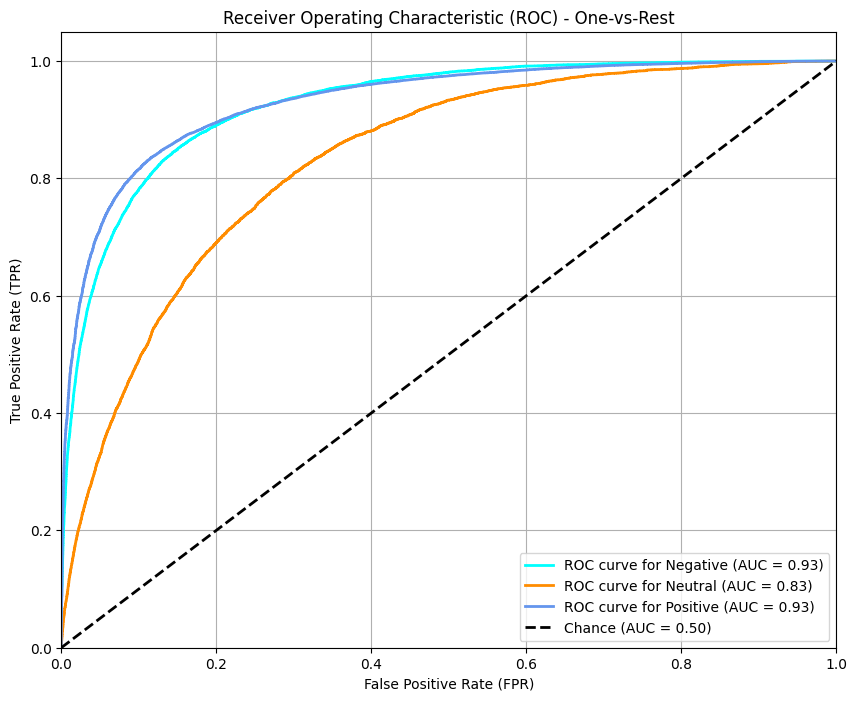

In [51]:
from sklearn.metrics import roc_curve, auc
y_test_binarized = label_binarize(y_test, classes=model.classes_)
n_classes = len(model.classes_)

# --- Построение ROC-кривых для каждого класса (One-vs-Rest) ---
plt.figure(figsize=(10, 8))

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']

# 1. Построение ROC-кривой для каждого класса
for i, class_name in enumerate(model.classes_):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i]) # Теперь roc_curve должна быть определена
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2,
             label=f'ROC curve for {class_name} (AUC = {roc_auc:.2f})')

# ... остальная часть вашего кода для построения графиков ...
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) - One-vs-Rest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Getting predictions

In [ ]:
def predict_sentiment(text, vectorizer, model):
    text_vectorized = vectorizer.transform([text]) # [text] -

    prediction = model.predict(text_vectorized)

    return prediction[0]


In [ ]:

new_text_positive = "This is a wonderful product, I absolutely love it! Best purchase ever."
new_text_negative = "Terrible experience, the item was broken and customer service was awful."
new_text_neutral_tricky = "The product is okay, it does what it says on the tin."

sentiment_positive = predict_sentiment(new_text_positive, vectorizer, model)
sentiment_negative = predict_sentiment(new_text_negative, vectorizer, model)
sentiment_neutral = predict_sentiment(new_text_neutral_tricky, vectorizer, model)

print(f"Text: '{new_text_positive}'\nForecast sentiment: {sentiment_positive}\n")
print(f"Text: '{new_text_negative}'\nForecast sentiment: {sentiment_negative}\n")
print(f"Text: '{new_text_neutral_tricky}'\nForecast sentiment: {sentiment_neutral}\n")

Text: 'This is a wonderful product, I absolutely love it! Best purchase ever.'
Forecast sentiment: Positive

Text: 'Terrible experience, the item was broken and customer service was awful.'
Forecast sentiment: Negative

Text: 'The product is okay, it does what it says on the tin.'
Forecast sentiment: Neutral



## Checking Sentiment Analysis Model

In [ ]:
my_review = "This is a wonderful product, I absolutely love it! Best purchase ever."
my_sentiment = predict_sentiment(my_review, vectorizer, model)
print(f"Text: '{my_review}'\nForecast sentiment: {my_sentiment}\n")

Text: 'This is a wonderful product, I absolutely love it! Best purchase ever.'
Forecast sentiment: Positive



In [ ]:
text_to_check = "This is a wonderful product, I absolutely love it! Best purchase ever."
text_vectorized = vectorizer.transform([text_to_check])
probabilities = model.predict_proba(text_vectorized)
print(f"Text: '{text_to_check}'")
print(f"Model classes: {model.classes_}")
print(f"Probabilities: {probabilities}")

Текст: 'This is a wonderful product, I absolutely love it! Best purchase ever.'
Model classes: ['Negative' 'Neutral' 'Positive']
Probabilities: [[0.13460396 0.0652042  0.80019184]]


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

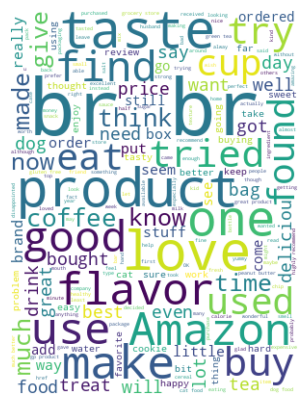

In [ ]:
text_column_name = 'all_text'

if text_column_name not in df.columns:
    print(f"Error: Column '{text_column_name}' not found in DataFrame.")
    print(f"Extisting columns: {df.columns.tolist()}")
else:

    all_text = " ".join(str(text) for text in df[text_column_name].dropna())

    if all_text.strip():
        wordcloud = WordCloud(width=300, height=400, background_color='white').generate(all_text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print("No text for Cloud generating.")